# EDA WITH DATA OF INTEREST

In this script we perform an exploratory data analysis before starting to apply time series methods.

In [12]:
# Importing packages:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [13]:
file_path = "../../data/01_raw/"
file_name = "b2-transactions.csv"

filtered_file_name="c1-filtered_transactions.csv"

sep=";"

In [14]:
dict_of_products={'croissant': 100,
                  'croissant petit': 103,
                  'tarta mousse 3 chocolates': 10002,
                  'tarta de manzana 2º': 462,
                  'palmeras de trufa': 182,
                  'tarta opera': 414,
                  'postre fresas y mascarpone': 4511,
                  'milhojas frambuesa 2º': 459,
                  'torteles': 112,
                  'baguette': 115}

In [33]:
filtered_df=pd.read_csv(file_path+filtered_file_name, sep=sep)

In [34]:
filtered_df.head()

,Unnamed: 0,product_id,description,section,store,date,units_ordered
0,47,100.0,CROISANTS,0,BmUP,2009-06-16,0
1,754,100.0,CROISANTS,0,BmUP,2012-12-21,15
2,1029,100.0,CROISANTS,0,BmUP,2014-03-14,18
3,1510,100.0,CROISANTS,0,BmUP,2013-07-30,6
4,1645,100.0,CROISSANT,0,BmUP,2019-07-03,4


In [35]:
filtered_df.rename(columns={'Unnamed: 0':'original_index'}, inplace=True)

In [50]:
products=filtered_df['product_id'].unique()
stores=filtered_df['store'].unique()

In [51]:
aaa=pd.pivot_table(data=filtered_df,values='units_ordered', index='date', columns=['store','product_id'])

In [28]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can 

In [58]:
aaa.fillna(0.0, inplace=True)

In [59]:
aaa

store        AaUP                                                             \
product_id 100.0      103.0  112.0  115.0  182.0  414.0     459.0     462.0    
date                                                                           
2008-01-01    0.0   3.000000    0.0   15.0    5.0    0.0  1.000000  0.000000   
2008-01-03    0.0  10.000000    0.0   10.0    2.0    0.0  0.500000  0.000000   
2008-01-04    0.0  12.000000    0.0   15.0    0.0    0.0  2.000000  0.000000   
2008-01-05    0.0   0.000000    0.0   10.0    0.0    0.0  4.000000  0.000000   
2008-01-06    0.0   0.000000    0.0    0.0    0.0    0.0  4.000000  0.000000   
2008-01-07    0.0   4.666667    0.0    2.0    0.0    0.0  2.000000  0.000000   
2008-01-08    0.0   3.500000    0.0   14.0    4.0    0.0  2.000000  0.000000   
2008-01-09    0.0   4.500000    0.0   10.0    4.0    0.0  2.000000  0.000000   
2008-01-10    0.0  14.000000    0.0   15.0    4.0    0.0  2.000000  0.000000   
2008-01-11    0.0   8.000000    0.0   15.0    5.0    0.0  1.500000  0.000000   
2008-01-12    0.0   4.000000    0.0   15.0    0.0    0.0  2.000000  2.000000   
2008-01-13    0.0   3.000000    0.0   10.0    6.0    0.0  6.000000  2.000000   
2008-01-14    0.0   3.500000    0.0    0.0    4.0    0.0  2.000000  1.000000   
2008-01-15    0.0   6.000000    0.0    2.0    4.0    0.0  2.000000  1.000000   
2008-01-16    0.0   1.600000    0.0    4.0    4.0    0.0  2.000000  1.000000   
2008-01-17    0.0   4.666667    0.0   15.0    4.0    0.0  2.000000  1.000000   
2008-01-18    0.0   4.000000    0.0   15.0    5.0    0.0  2.000000  1.000000   
2008-01-19    0.0   3.750000    0.0    7.5   10.0    0.0  1.000000  1.500000   
2008-01-20    0.0   4.000000    0.0   15.0   10.0    0.0  0.800000  3.000000   
2008-01-21    0.0  10.000000    0.0    4.0    4.0    0.0  2.000000  1.000000   
2008-01-22    0.0   2.500000    0.0    6.0    4.0    0.0  2.000000  1.000000   
2008-01-23    0.0  14.000000    0.0    6.0    4.0    0.0  2.000000  1.000000   
2008-01-24    0.0   2.000000    0.0    8.0    4.0    0.0  2.000000  0.000000   
2008-01-25    0.0   3.600000    0.0   15.0    4.0    0.0  1.000000  0.000000   
2008-01-26    0.0   8.000000    0.0   20.0    8.0    0.0  2.000000  3.000000   
2008-01-27    0.0   2.500000    0.0   25.0    6.0    0.0  3.000000  3.000000   
2008-01-28    0.0   4.000000    0.0    4.0    4.0    0.0  2.000000  1.000000   
2008-01-29    0.0   3.750000    0.0    6.0    4.0    0.0  2.000000  1.000000   
2008-01-30    0.0   2.857143    0.0    6.0    4.0    0.0  2.000000  0.500000   
2008-01-31    0.0   7.000000    0.0    8.0    4.0    0.0  2.000000  1.000000   
...           ...        ...    ...    ...    ...    ...       ...       ...   
2019-09-01   10.0   3.000000   20.0    8.0    3.0    0.0  0.666667  1.000000   
2019-09-02    9.0  12.000000   19.0    7.0    3.0    0.0  1.000000  1.000000   
2019-09-03   12.0  12.000000   24.0   10.0    2.0    0.0  1.000000  1.000000   
2019-09-04   12.0  10.000000   22.0    9.0    0.0    0.0  1.000000  0.500000   
2019-09-05    6.0  10.000000   18.0    9.0    3.0    0.0  0.500000  1.000000   
2019-09-06    2.0  12.000000   35.0   10.0    1.0    0.0  1.000000  1.000000   
2019-09-07    5.0  11.000000   35.0   18.0    3.0    0.0  0.500000  2.000000   
2019-09-08    6.0  15.000000   30.0   21.0    3.0    0.0  1.000000  1.000000   
2019-09-09    7.0  20.000000   22.0   12.0    0.0    0.0  1.000000  1.000000   
2019-09-10    6.0   9.000000   20.0    9.0    2.0    0.0  0.500000  1.000000   
2019-09-11    7.0  22.000000   22.0    9.0    3.0    0.0  1.000000  1.000000   
2019-09-12    7.0  22.000000   22.0    9.0    2.0    0.0  1.000000  1.000000   
2019-09-13    9.0  19.000000   35.0    9.0    2.0    0.0  1.000000  1.000000   
2019-09-14    8.0   9.000000   35.0   20.0    3.0    0.0  1.000000  1.000000   
2019-09-15    6.0  18.000000   30.0   26.0    4.0    0.0  0.750000  0.666667   
2019-09-16    7.0  22.000000   25.0    9.0    3.0    0.0  1.000000  1.000000   


In [74]:
prov=filtered_df.groupby(['product_id','date'], as_index=False).sum()[['product_id', 'date', 'units_ordered']]

In [76]:
bbb=pd.pivot_table(data=prov,values='units_ordered', index='date', columns='product_id')

In [79]:
bbb.fillna(0.0, inplace=True)

In [80]:
bbb

product_id,100.0,103.0,112.0,115.0,182.0,414.0,459.0,462.0,4511.0
date,,,,,,,,,
2008-01-01,62.0,306.0,256.0,86.0,46.0,4.0,11.0,0.0,0.0
2008-01-03,65.0,78.0,231.0,61.0,36.0,0.0,11.0,0.0,0.0
2008-01-04,42.0,56.0,150.0,119.0,49.0,0.0,10.0,0.0,0.0
2008-01-05,15.0,27.0,45.0,98.0,9.0,5.0,7.0,0.0,0.0
2008-01-06,38.0,54.0,106.0,130.0,2.0,0.0,8.0,0.0,0.0
2008-01-07,40.0,159.0,188.0,127.0,22.0,2.0,13.0,1.0,0.0
2008-01-08,66.0,204.0,285.0,79.0,42.0,3.0,10.0,4.0,0.0
2008-01-09,75.0,574.0,267.0,69.0,37.0,1.0,12.0,6.0,0.0
2008-01-10,59.0,145.0,227.0,65.0,43.0,0.0,10.0,7.0,0.0


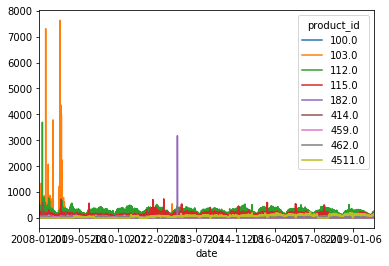

In [85]:
bbb.plot()

In [86]:
bbb.max()

product_id
100.0      260.0
103.0     7634.0
112.0     3695.0
115.0      736.0
182.0     3174.0
414.0      590.0
459.0      111.0
462.0       63.0
4511.0     236.0
dtype: float64